### Lecture #3: Bayesian Modeling
## AM 207: Advanced Scientific Computing
### Stochastic Methods for Data Analysis, Inference and Optimization
### Fall, 2021

<img src="fig/logos.jpg" style="height:150px;">

In [9]:
### Import basic libraries
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Outline
1. Review of the Method of Maximum Likelihood
2. Models for Real Data
3. The Beta-Binomial Model
4. Bayesian Modeling
5. Connections and Comparisons with Frequentist Inference

# Review of the Method of Maximum Likelihood

## The Method of Maximum Likelihood

1. **(Model)** Assume observations from $N$ number of ***independently and identically distributed*** outcomes, $Y_1, \ldots, Y_N$, with $Y_n \sim p(Y|\theta)$ and where $\theta$ is the set of parameters of the distribution $p(Y|\theta)$. The likelihood function is
  \begin{aligned}
    \mathcal{L}(\theta) = \prod_{n=1}^N p(y_n | \theta)
  \end{aligned}

2. **(Inference)**
  We estimate $\theta$ using the ***maximium likelihood estimate***, defined as
    \begin{aligned}
    \theta_{\text{MLE}} = \underset{\theta}{\mathrm{argmax}}\; \mathcal{L}(\theta) = \underset{\theta}{\mathrm{argmax}}\; \prod_{n=1}^N p(y_n | \theta)
    \end{aligned}

3. **(Inference Method)**
  - *Unconstrained Optimization:* if $\theta$ doesn't need to satisfy any special property, then it's as simple as setting the ***gradient*** of the likelihood equal to zero and solving! 
    **(Except it's not that simple!)**<br><br>
    
   - *Constrained Optimization:* if $\theta$ needs to satisfy special properties, then it's as simple as setting the gradient of the ***Lagrangian*** of the likelihood and the constraint equal to zero and solving! 
    **(Except it's not that simple!)**

## Evaluating the MLE    
If we have the true parameters $\theta$, we can compute the ***Mean Squared Error***:

$$
\mathrm{MSE}_{\theta} = \mathbb{E}_{Y^{\theta}}\left[(\theta_{\text{MLE}}\left(Y^\theta\right) - \theta)^2\right]
$$

If we don't have the true parameters $\theta$, we can use $\theta_{\text{MLE}}$ ***predict*** or ***simulate*** data and compare it with the observed data, i.e. sample

$$
Y^{\theta_{\text{MLE}}} \sim p(Y| \theta_{\text{MLE}}),
$$

compare $Y^{\theta_{\text{MLE}}}$ and $Y^{\theta}$.

## Properties of The Maximum Likelihood Estimator
**Why Choose MLE?**
Asymptotically, i.e. given an infinite number of samples, the MLE is
1. *Consistent:* $\theta_{\text{MLE}}$ approaches the true parameters $\theta$.
2. *Unbiased:* The average $\theta_{\text{MLE}}$, taken over many different samples of the data, is $\theta$.
3. *Minimum Variance:* The MLE has the lowest variance of all unbiased estimators.

**Why Not Choose MLE?**
When the sample size is "small", the MLE can be
1. *Overfitted:* The MLE can is sensitive to outliers in the data.
2. *Biased:* The average $\theta_{\text{MLE}}$, taken over many different data samples, is not $\theta$.
3. *Imprecise:* The MLE can have high variance.

**What Other Estimators are There?**
1. Method of Moments
2. Minimum Variance Unbiased Estimator
3. Regularized MLE

**Note:** the computation of (1) and (2) can be much more complex than MLE. 

## Is Bias Always Bad?

Recall that we can use the properties of expectations to decompose the mean squared error of the maximum likelihood estimator:

$$
\mathrm{MSE}_{\theta_{\text{MLE}}} = \underbrace{\mathbb{E}\left[(\theta_{\text{MLE}} - \mathbb{E}[\theta_{\text{MLE}}])^2\right]}_{\text{variance}} + \underbrace{\left( \mathbb{E}[\theta_{\text{MLE}}] - \theta\right)^2}_{\text{bias}}
$$

Although we want an unbiased estimator, the above decomposition says that if the variance of the estimator is high our espected error will nonetheless be high.

The ***variance-bias trade-off*** refers to the phenomenon that, in many cases, when estimators have low bias they have high corresponding variance (and vice versa), and hence high MSE. 

#### Decomposition of MSE
\begin{aligned}
\mathrm{MSE}_{\theta_{\text{MLE}}} &= \mathbb{E}_{Y^\theta} \left[\left(\theta_{\text{MLE}} - \theta \right)^2 \right]\\
&= \mathbb{E}_{Y^\theta}\left[\left( \theta_{\text{MLE}} - \mathbb{E}[\theta_{\text{MLE}}] + \mathbb{E}[\theta_{\text{MLE}}] - \theta \right)^2 \right]\\
&= \mathbb{E}\left[\left(\theta_{\text{MLE}} - \mathbb{E}[\theta_{\text{MLE}}]\right)^2\right] + \mathbb{E}\left[\left(\mathbb{E}[\theta_{\text{MLE}}] - \theta \right)^2 \right] + 2\mathbb{E}\left[ (\theta_{\text{MLE}} - \mathbb{E}[\theta_{\text{MLE}}])(\mathbb{E}[\theta_{\text{MLE}}] - \theta)\right]\\
&= \underbrace{\mathbb{E}\left[(\theta_{\text{MLE}} - \mathbb{E}[\theta_{\text{MLE}}])^2\right]}_{\text{variance}} + \underbrace{\left( \mathbb{E}[\theta_{\text{MLE}}] - \theta\right)^2}_{\text{bias}}
\end{aligned}

#### Example of the Bias Variance Trade-off
Let $Y \sim\mathcal{N}(0, \sigma^2)$. Consider two estimators of the variance $\sigma^2$:
1. $\widehat{\theta}_1(Y) = Y^2$
2. $\widehat{\theta}_2(Y) = \frac{1}{3}Y^2$

The expected values of the estimators are:
1. $\mathbb{E}[\widehat{\theta}_1] = \mathbb{E}[Y^2]=\sigma^2$, using the fact $Y^2$ is a Gamma distribution with mean $\sigma^2$.
2. $\mathbb{E}[\widehat{\theta}_1] = \mathbb{E}[Y^2]=\frac{1}{3}\sigma^2$
So we see that $\widehat{\theta}_1$ is unbiased, whereas $\widehat{\theta}_2$ is biased.

Note that the two estimators are both of the form $cY^2$ where $c$ is a constant. We can compute the MSE, in a general way, for this class of estimators:

\begin{aligned}
\mathrm{MSE}_{\widehat{\theta}} &= \mathbb{E}\left[\left(\widehat{\theta}_2 - \sigma^2\right)^2\right]\\
&= \mathbb{E}\left[c^2Y^4 - 2\sigma^2 cY^2 + \sigma^4 \right]\\
&= c^2\mathbb{E} \left[Y^4 \right] - 2\sigma^2c\mathbb{E} \left[Y^2 \right] + \sigma^4\\
&= 3c^2\sigma^4 - 2c\sigma^4 + \sigma^4\\
&= \sigma^4(3c^2 - 2c + 1)
\end{aligned}

From the expression of the MSE, we can find the $c$ that will minimize $\mathrm{MSE}_{\widehat{\theta}}$ - this involves finding the stationary points of the derivative of $\mathrm{MSE}_{\widehat{\theta}}$ (and then checking concavity/convexity!):

$$
\frac{d}{dc}\mathrm{MSE}_{\widehat{\theta}} = \sigma^4(6a - 2) = 0
$$

We see that $\mathrm{MSE}_{\widehat{\theta}}$ has a unique global minimum at $c = \frac{1}{3}$. That is, the biased estimator $\widehat{\theta}_2$ has smaller MSE than the unbiased estimator $\widehat{\theta}_1$.


## Limitations of MLE: Overfitting Under Scarcity of Data
Suppose that we have three observations from a Bernoulli distribution, $Ber(\theta)$: $\{ H, H, H\}$. From what we've see before, the MLE of $\theta$ is
$$
\theta_{\text{MLE}} = \frac{3}{3} = 1.
$$
Is this a good estimate of the bias of the coin? What can we do to make this estimate better?

## Limitations of MLE: Overfitting Under Scarcity of Data
Suppose that we have two YouTube videos with 4/5 likes and 3,500/5,000 likes respectively. We can model the probability that a viewer will like each video as two Bernoulli distribtutions, $Ber(\theta_1)$, $Ber(\theta_2)$, where $\theta_i$ is the "inherent" likeability of each video. 

Again, we can compute the MLE of the Bernoulli parameters:

$$
\theta_1 = 4/5 = 0.8,\; \theta_2 = 3,500/5,000 = 0.75.
$$

It is fair to say that the second video is more likeable base on our estimates?

## Regularization
We can prevent MLE from overfitting to the observations when training data is scarce by constraining it from unreasonable values. 

Recall that in order to prevent the MLE solution for linear regression from learn unrealistically large slopes and intercepts, we add $\ell_2$-regularization on the model parameters during training, essentially forcing the parameters to stay as small (close to zero) as they can be while still capturing the data. 

Similarly, if want the MLE of the parameter $\theta$ of a Bernoulli distribution to avoid extreme values (1 and 0), we need to 'anchor' our estimation of $\theta$ to some 'reasonable' value:

\begin{align}
\theta_{\text{MLE Reg.}} = \frac{\text{# positive outcome} + \alpha}{\text{# total trials} + \beta}
\end{align}

The fraction $\alpha/\beta$ expresses your notion of what is a reasonable looking probability.

But is regularization a principled way to perform inference (i.e. will it ruin the nice properties of MLE)? How do you choose the hyperparameters $\alpha$, $\beta$ in a principled manner?

# Models for Real Data

## Die Roll
We can model the outcome, $Y$, of a single dice roll with a ***categorical*** distribution,

$$
Y \sim Cat(\theta)
$$

where $\theta = [\theta_1 \ldots \theta_6]$ is a vector satisfying $\sum_{i=1}^6 \theta_i = 1$, and where $\theta_i$ is the probability of rolling a number $i$. 

Given $Y_1,\ldots, Y_N$ identically and independently distributed outcomes with $Y_n \sim Cat(\theta)$. Denote the total number observed for each face as a vector $F = [f_1 \ldots f_6]$, where $f_i$ is the number of times the number $i$ was rolled. Then $F$ can be modeled with a ***multinomial*** distribution,

$$
F \sim Mul(N, \theta).
$$

**Model Critique:** What are the assumptions made in this model? Are they realistic?

## Video Ranking

We can model the outcome, $Y$, of a user rating for a specific YouTube video as a Bernoulli distribution,

$$
Y \sim Ber(\theta)
$$

where $\theta$ is the probability that a user will like the video. 

Given $Y_1,\ldots, Y_N$ identically and independently distributed outcomes with $Y_n \sim Ber(\theta)$. Denote the total number of likes by $L$. Then $L$ can be modeled with a ***binomial*** distribution,

$$
L \sim Bin(N, \theta).
$$

**Model Critique:** What are the assumptions made in this model? Are they realistic?

## Kidney Cancer Rates
Given a dataset with $N$ number of US counties and the incidents of kidney cancer in each county, we can model the observed incidents of cancer, $C_n$, of the $n$-th county with a Poisson distribution,

$$
C_n \sim Poi(T_n\theta_n)
$$

where $T_n$ is the total population of the county and $\theta_n$ is the "true" cancer rate of the county. 

**Model Critique:** What are the assumptions made in this model? Are they realistic?

## Kidney Cancer Rates
The following is a visualization of the counties with the highest rates of kidney cancer (Gelman 1998). Is there any noticeable spatial pattern in these maps? Recall that the MLE of the rate of the Poisson distribution for each county is $\frac{C_n}{T_n}$.

<img src="fig/kidney.jpg" style="height:350px;">

## Birth Weights

In our lab, we work with IVF clinics to build models for prediction and data analysis. One of our current tasks is to model the birth weights of the infants born in the clinic. 

Naively, given observed birth weights $Y_1, \ldots, Y_N$, we can model each outcome $Y_n$ with a normal distribution,

$$
Y_n \sim \mathcal{N}(\mu, \sigma^2)
$$

where $\mu$ is the average birth weight for this population and $\sigma^2$ is the population variance.


**Model Critique:** What are the assumptions made in this model? Are they realistic?

# The Beta-Binomial Model

## The Coin Toss Model: Revisited

Suppose that we have three observations from a Bernoulli distribution, $Ber(\theta)$: $\{ H, H, H\}$. The MLE of $\theta$ is
$$
\theta_{\text{MLE}} = \frac{3}{3} = 1.
$$
This is a clear case of the MLE overfitting to the observed data.

Last time, you'd suggested tying the estimate to some fixed reasonable number, for example,
$$
\theta_{\text{MLE Reg}} = \frac{H + 1}{N + 2},
$$
and in general,
$$
\theta_{\text{MLE Reg}} = \frac{H + \alpha}{N + \beta}.
$$
The terms $\alpha$ and $\beta$ are called ***regularization terms*** .

**Question:** What is the effect of $\alpha$, $\beta$ on our estimate? What values should we choose for $\alpha$, $\beta$?

## Incoporating Prior Beliefs

Our choise of the regularization terms, $\alpha$, $\beta$, depends on our prior beliefs about the coin. The way we chose to incorporate these beliefs doesn't indicate any uncertainty. 

Alternatively, we can incorporate our prior belief about $\theta$ as a distribution, this is called the ***prior distribution***. Since $\theta$ is a number between 0 and 1, a beta distribution is an appropriate choice.

<img src="fig/beta.jpg" style="height:350px;">

## The Beta-Binomial Model
A model that involves both a likelihood for the data and prior on the parameters in the likelihood is called a ***Bayesian model***.

**Bayesian Model for Coin Flip**

\begin{aligned}
Y &\sim Bin(N, \theta),\quad &\text{(Likelihood)}\\
\theta &\sim Beta(\alpha, \beta),\quad &\text{(Prior)}
\end{aligned}

where $\alpha, \beta$ are called ***hyperparameters*** of the model.


Now, computing the MLE no longer makes sense (since the MLE only considers the likelihood). Luckily, Bayes' Rule allows us to derive a distribution that considers both the prior and the likelihood:

\begin{aligned}
p(\theta | Y) = \frac{\overbrace{p(Y| \theta)}^{\text{likelihood}} \overbrace{p(\theta)}^{\text{prior}}}{\underbrace{p(Y)}_{\text{marginal data likelihood}}} = \frac{p(Y, \theta)}{\int p(Y, \theta) d\theta}
\end{aligned}

The distribution $p(\theta | Y)$ is called the ***posterior***. 

## Posterior for the Beta-Binomial Model

In our case, the posterior is given by
\begin{aligned}
p(\theta | Y) = \frac{p(Y| \theta)p(\theta)}{p(Y)} = \frac{\overbrace{{N \choose Y}\theta^{Y}(1- \theta)^{N-Y}}^{\text{binomial pdf}} \overbrace{\frac{1}{B(\alpha, \beta)} \theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}^{\text{beta pdf}}}{p(Y)}
\end{aligned}
We can rewrite the posterior as

\begin{aligned}
p(\theta | Y) = const * \theta^{(Y+\alpha) - 1}(1 - \theta)^{(N-Y + \beta) - 1}
\end{aligned}

where $const = \frac{{N \choose Y}}{B(\alpha, \beta)p(Y)}$ must be the normalizing constant for $p(\theta | Y)$.

We recognize the posterior as a beta distribution, $Beta(Y+\alpha, N-Y + \beta)$! Can you see why?

## Interpreting the Posterior: Bayesian Update

Rather than a point estimate for $\theta$, we now have a posterior distribution, $p(\theta|Y)$, over $\theta$. What does the posterior tell us about $\theta$?

Since the prior distribution $p(\theta)$ encoded our beliefs about $\theta$ along with our uncertainty, it is natural to interpret the posterior as yet another **belief** about $\theta$. 

Since the posterior includes the likelihood, this belief has been **updated by the data**. 

## Simulation: Bayesian Update for the Coin Flip

What is the effect of the choice of the prior on the posterior? What is the effect of the number of observations, $N$, on the posterior?

In [122]:
#a function for computing the prior and the posterior (after simulating data)
def make_models(alpha, beta, N, theta):
    #prior definition: beta distribution
    prior = sp.stats.beta(alpha, beta).pdf
    
    #sample data
    H = np.random.binomial(N, theta)
    
    #update posterior: beta distribution
    posterior_alpha = H + alpha
    posterior_beta = N - H + beta
    posterior = sp.stats.beta(posterior_alpha, posterior_beta).pdf
    
    return prior, posterior, H, posterior_alpha, posterior_beta

# a function for ploting the prior and posterior distribution
def plot_prior_posterior(ax, prior, posterior, H, N):
    x = np.linspace(0, 1, 100)
    
    ax[0].plot(x, prior(x), color='blue')
    ax[0].set_title('Prior distribution')
    ax[1].plot(x, posterior(x), color='red')
    ax[1].set_title('Posterior distribution after seeing {} Heads/{} Flips'.format(H, N))
    return ax

#prior definition: beta distribution
#try: alpha = beta = 0.5, 1, 10; try: alpha=10, beta=1; try: alpha=1, beta=10
alpha = 0.5
beta = 0.5
#data: binomial distribution
N = 10
theta = 0.3

prior, posterior, H, posterior_alpha, posterior_beta = make_models(alpha, beta, N, theta)

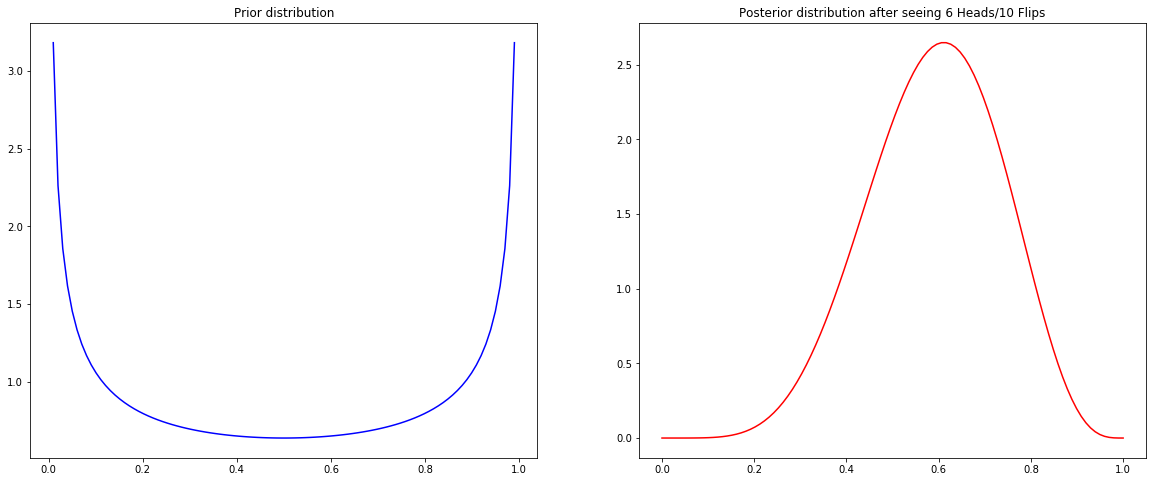

In [123]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax = plot_prior_posterior(ax, prior, posterior, H, N)
plt.show()

## Simulation: Iterated Bayesian Update for the Coin Flip

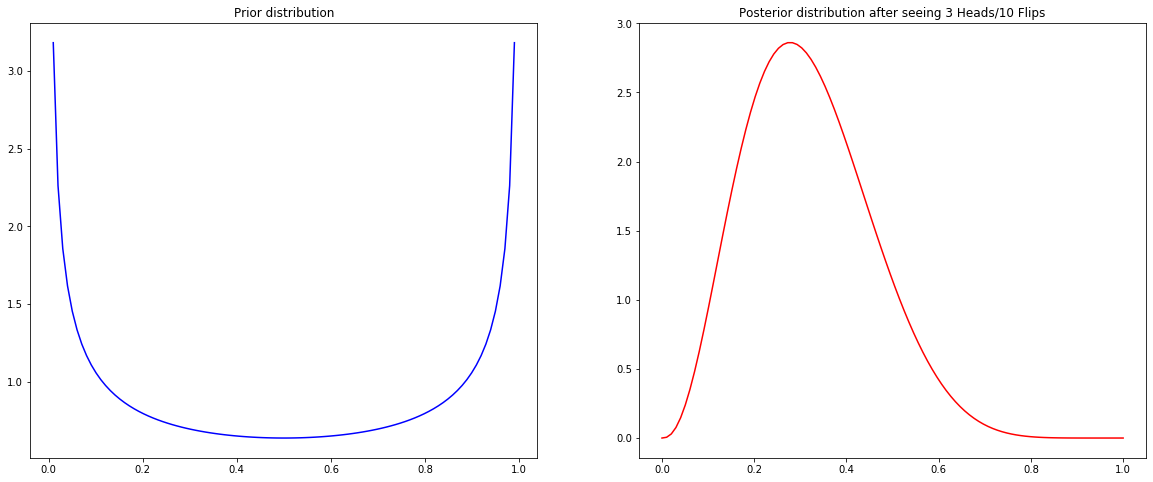

In [137]:
#run this multiple times to see the effect of updates
posterior_alpha = 0.5
posterior_beta = 0.5
prior, posterior, H, posterior_alpha, posterior_beta = make_models(posterior_alpha, posterior_beta, N, theta)
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax = plot_prior_posterior(ax, prior, posterior, H, N)
plt.show()

## Making Predictions

If the posteriors we infer represent beliefs, how do we evaluate these beliefs? 

1. In the case that we the true parameter $\theta^{\text{true}}$, we can check to see if the posterior assigns high likelihood to $\theta^{\text{true}}$, and the certainty the posterior has around $\theta^{\text{true}}$.<br><br>

2. When we do not know $\theta^{\text{true}}$, we can simulate data $Y^{\theta}$ using samples of $\theta$ from the posterior. We compare the distribution of simulated data, or ***posterior predictive***, to the observed data. 

## Simulation: Posterior Predictive for the Coin Flip

In [101]:
# function to plot the posterior predictive of the beta-binomial model
def plot_posterior_predictive(ax, posterior_pred, H):
    ax.axvline(x=H, color='black', label='observed heads')
    ax.hist(posterior_pred, bins=50, color='red', alpha=0.6, label='histogram of predicted head')
    ax.set_xticks(range(np.max(posterior_pred) + 1))
    ax.set_title('posterior predictive over heads')
    ax.legend(loc='best')
    return ax

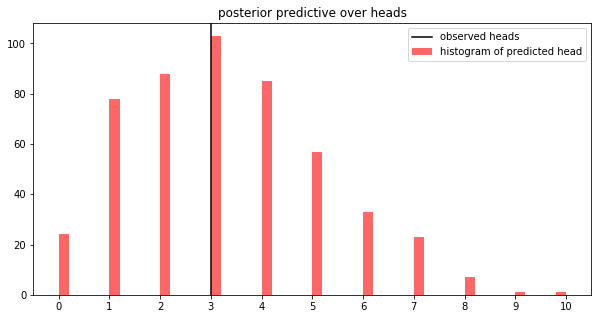

In [102]:
posterior_samples = np.random.beta(posterior_alpha, posterior_beta, size=500)
posterior_pred = [np.random.binomial(N, theta_sample, 1)[0] for theta_sample in posterior_samples]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = plot_posterior_predictive(ax, posterior_pred, H)
plt.show()

# Bayesian Modeling - A Summary

## The Bayesian Modeling Process

In order to make statements about $Y$, the outcome, and $\theta$, parameters of the distribution generating the data, we form the joint distribution over both variables and use the various marginals/conditional distributions to reason about $Y$ and $\theta$.

1. we form the ***joint distribution*** over both variables $p(Y, \theta) = p(Y | \theta) p(\theta)$.

2. we can condition on the observed outcome to make inferences about $\theta$,
$$
p(\theta | Y) = \frac{p(Y, \theta)}{p(Y)}
$$
where $p(\theta | Y)$ is called the ***posterior distribution*** and $p(Y)$ is called the ***evidence***.
3. before any data is observed, we can simulate data by using our prior
$$
p(Y^*) = \int_\Theta p(Y^*, \theta) d\theta = \int_\Theta p(Y^* | \theta) p(\theta) d\theta
$$
where $Y^*$ represents new data and $p(Y^*)$ is called the ***prior predictive***.
4. after observing data, we can simulate new data simliar to the observed data by using our posterior
$$
p(Y^*|Y) = \int_\Theta p(Y^*, \theta|Y) d\theta = \int_\Theta p(Y^* | \theta) p(\theta | Y) d\theta
$$
where $Y^*$ represents new data and $p(Y^*|Y)$ is called the ***posterior predictive***.

## Evaluating Bayesian Models

As we have seen in the Beta-Binomial model, we can simulate the posterior (and prior) predictive rather than compute them analytically. That is, you don't need to know the pdf of $p(Y^*|Y)$. 

The posterior predictive can be represented by **samples** of predictions:

1. we sample values of $\theta_n$ from the posterior, $p(\theta|Y)$.
2. we sample an outcome $Y_n$ from $p(Y|\theta_n)$ for each posterior sample $\theta_n$.

The set $Y_n$ we obtain emprirically represents the posterior predictve distribution $p(Y^*|Y)$. 

How do we evaluate the quality of our Bayesian model: how appropriate was our choice of prior? How appropriate was our choice of noise structure for the data (i.e. how appropriate is our choice of likelihood)?

Evaluating Bayesian models is challenging for two reasons:

1. Instead of learning a single best estimate of the model parameters $\theta$, like in the case of maximum likelihood estimation, we learn a distribution over possible values of $\theta$, $p(\theta|Y)$
2. In real life we do not have access to the ground truth values of model parameters

Thus, we evaluate our model by seeing how well it fits the observed data. That is, we check to see how well our predicted distribution of $Y^*$, $p(Y^* | Y)$, matches up with the observed data $Y^*$.

When we are able to visualize the data (i.e. when $Y^*$ is low-dimensional), we can visualize both data $Y^*$ and samples from  $p(Y^* | Y)$. If the model is a good fit for the data, these two plots should be similar.

But what if it's not possible to visualize the data?

## Where do Priors Come From?

Hopefully you've noticed a key property of the priors we chose:

>  All the priors combined with the likelihood to form a distribution we recognize! Specifically, the posterior distribution is of the same type as the prior!

These priors are called ***conjugate priors*** for the corresponding likelihoods. This is a purely mathematical property.

**Question:** is it right to choose priors that are mathematically convenient? What is a good way to choose a prior? What if we "choose wrong"?

## Uninformative Priors: How to Say I Don't Know

If you don't have a strong prior believe about the parameters in the likelihood, you should choose a prior that has no effect when combined with the likelihood -- i.e. **let the data speak for itself**.

**Example:**
In the Beta-Binomial model, is there a choice of the hyperparameters of the prior that has no effect on the posterior?

We might try $Beta(1, 1)$, which is the uniform distribution over $[0, 1]$. The posterior $p(\theta|Y)$ is then $Beta(Y + 1, N - Y + 1)$. In the following example, visualizing the posterior, we see that the posterior assigns the highest mass to the MLE of $\theta$. But the posterior assigns more mass to values of $\theta$ smaller than the MLE. In this sense, the prior **does** inform the posterior. 

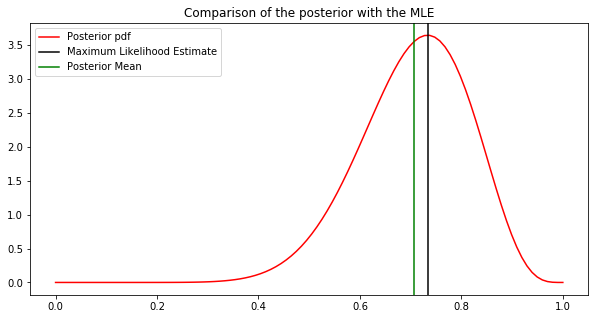

In [114]:
Y = 11
N = 15
MLE = Y * 1. / N
posterior = sp.stats.beta(Y + 1, N - Y + 1).pdf
posterior_mean = (Y + 1.) / (N + 2.)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
x = np.linspace(0, 1, 100)
ax.plot(x, posterior(x), color='red', label='Posterior pdf')
ax.axvline(x=MLE, color='black', label='Maximum Likelihood Estimate')
ax.axvline(x=posterior_mean, color='green', label='Posterior Mean')
ax.set_title('Comparison of the posterior with the MLE')
ax.legend(loc='best')
plt.show()

There is a general purpose technique for creating non-informative priors, called ***Jeffreys priors***, which places less prior weight on parameter values where the likelihood function is flat. This prevents the prior from having undue influency on the posterior.

There are many resources that cover the construction of Jeffreys priors for common likelihoods.